# Files Loading and Import Libararies

In [1]:
# Upload files (if not already uploaded)
# Make sure don't reload data again.
# Make sure load file: College_Data.csv

from google.colab import files
uploaded = files.upload()

Saving College_Data.csv to College_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

# Data Import

## Data import and showing

In [3]:
df = pd.read_csv('College_Data.csv',index_col=0)

In [4]:
df.head() # check data head

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Data Visulation

** Create a scatterplot of Grad.Rate versus Room.Board (and their linear fit) where the points are colored by the Private column. **

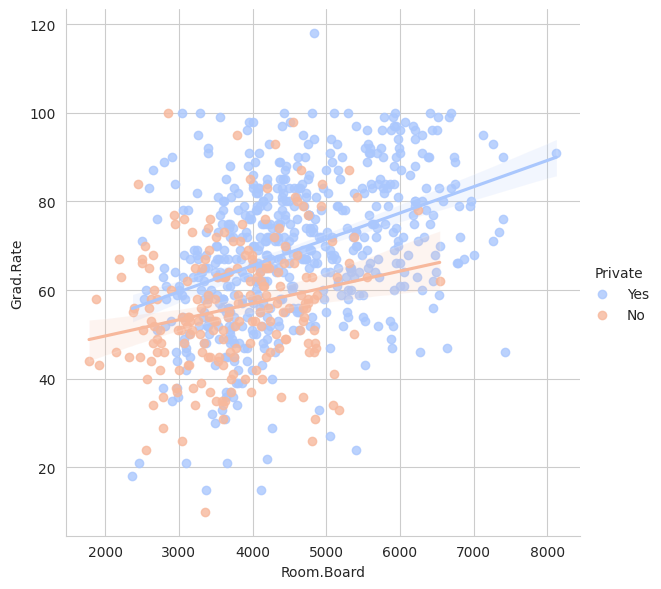

In [7]:
# Create a scatterplot of Grad.Rate versus Room.Board (and their linear fit) where the points are colored by the Private column.

sns.set_style('whitegrid')
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private',
           palette='coolwarm', height=6, aspect=1, fit_reg=True)
plt.show()

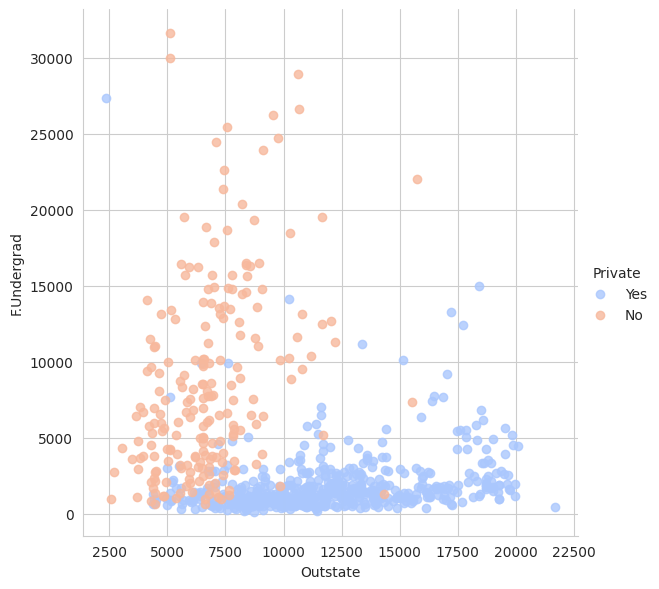

In [8]:
# Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.
# The plot shows that these two feature dimensions separate out baed on the type of college

sns.set_style('whitegrid')
sns.lmplot(x='Outstate', y='F.Undergrad', data=df, hue='Private',
           palette='coolwarm', height=6, aspect=1, fit_reg=False)

plt.show()

<Axes: xlabel='Private', ylabel='S.F.Ratio'>

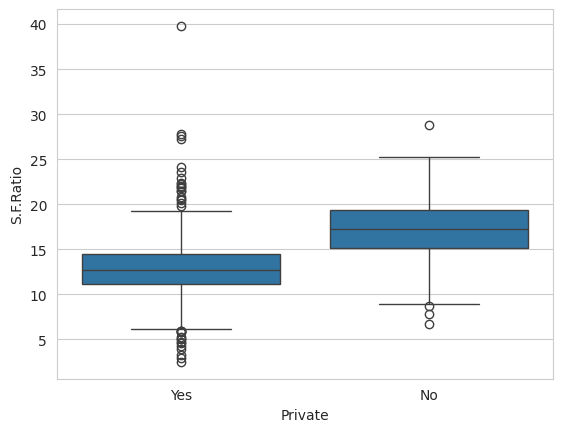

In [9]:
# Create a boxplot of student-faculty ratio based on college type

sns.boxplot(x='Private',y='S.F.Ratio',data=df)

<Axes: xlabel='Private', ylabel='perc.alumni'>

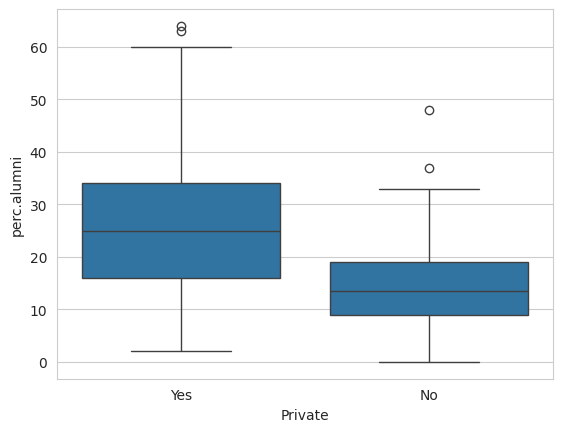

In [10]:
# Create a boxplot of percent of alumni who donate based on college type

sns.boxplot(x='Private',y='perc.alumni',data=df)

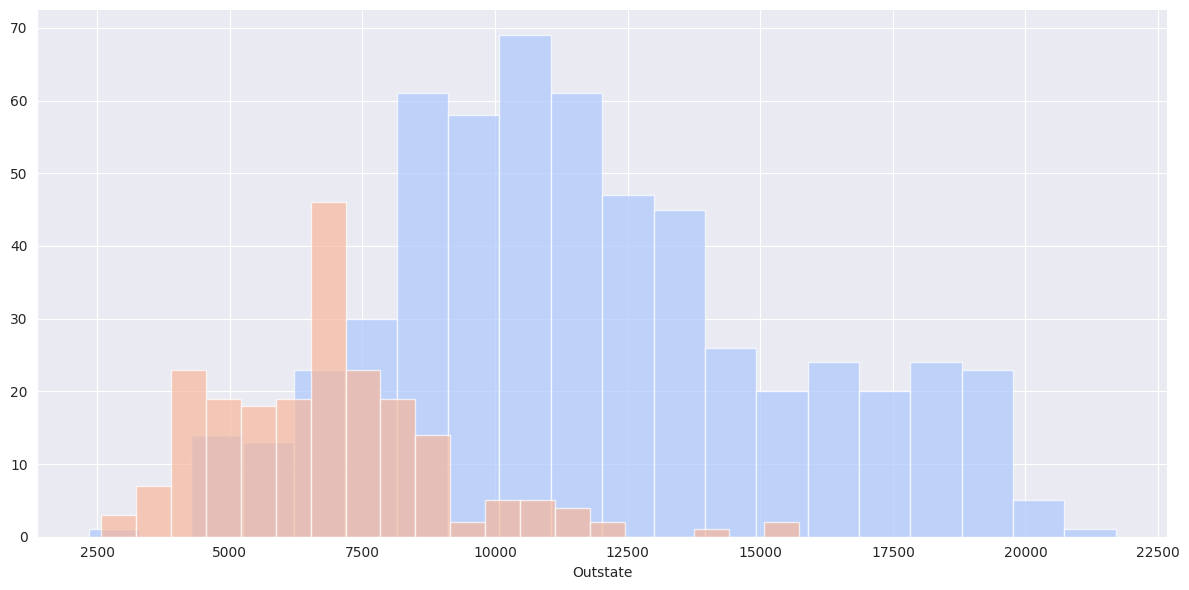

In [11]:
# Create a stacked histogram showing Out of State Tuition based on the Private column

sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue="Private", palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

plt.show()

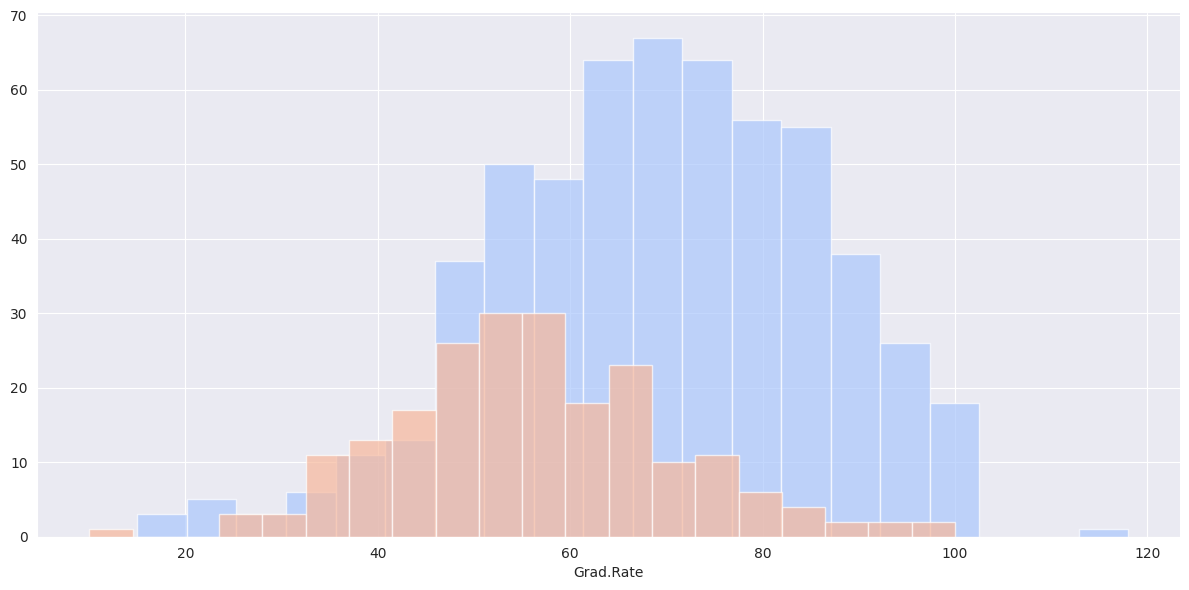

In [12]:
# Create a similar histogram for the Grad.Rate column

sns.set_style('darkgrid')

g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

## Data Processing

In [13]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [14]:
# Set that school's graduation rate to 100 so it makes sense.

df['Grad.Rate']['Cazenovia College'] = 100


In [15]:
# Check if the school's graduation rate is set to 100
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


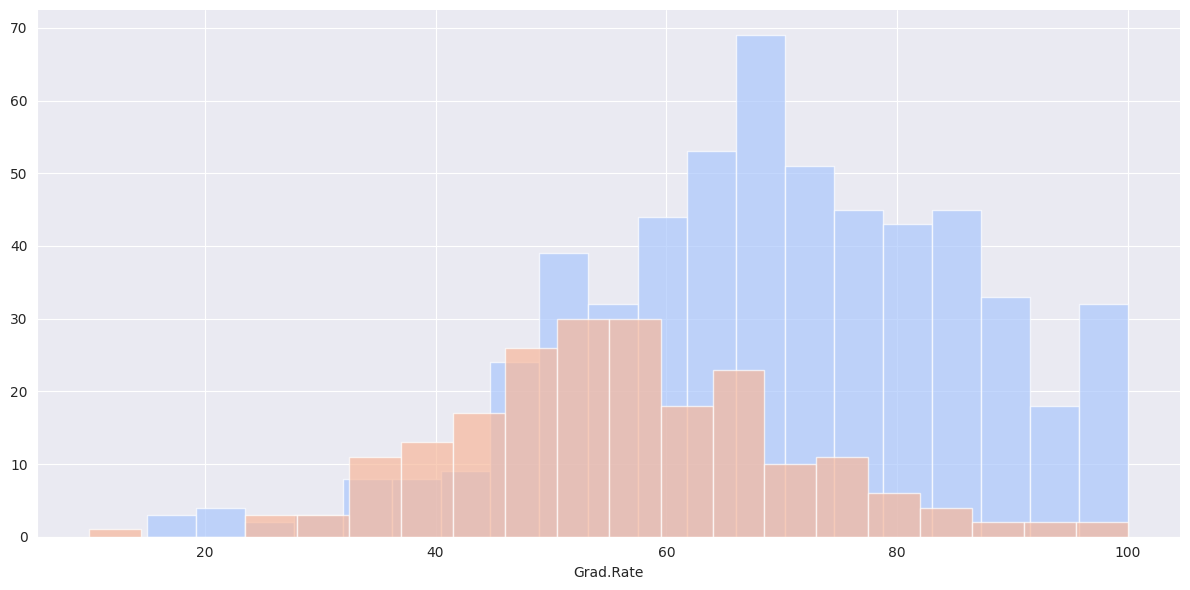

In [16]:
# Create a similar histogram for the Grad.Rate column after data processing

sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

# Machine learning model (2-clutering-Models)

## Prepare Fit Data for Model

In [17]:
# Prepare data
df_h = df.copy(deep=True)
df_h['Private'] = df_h['Private'].replace({'Yes': 1, 'No': 0})
df_h.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [18]:
# Drop the 'Private' column for clustering
df_h1 = df_h.drop('Private', axis=1)
df_h1.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Hierarchical Clustering

In [19]:
# Hierarchical Clustering Dendrogram
X = df_h1.iloc[:,[3,4]].values
linked = sch.linkage(df_h1, method='ward')

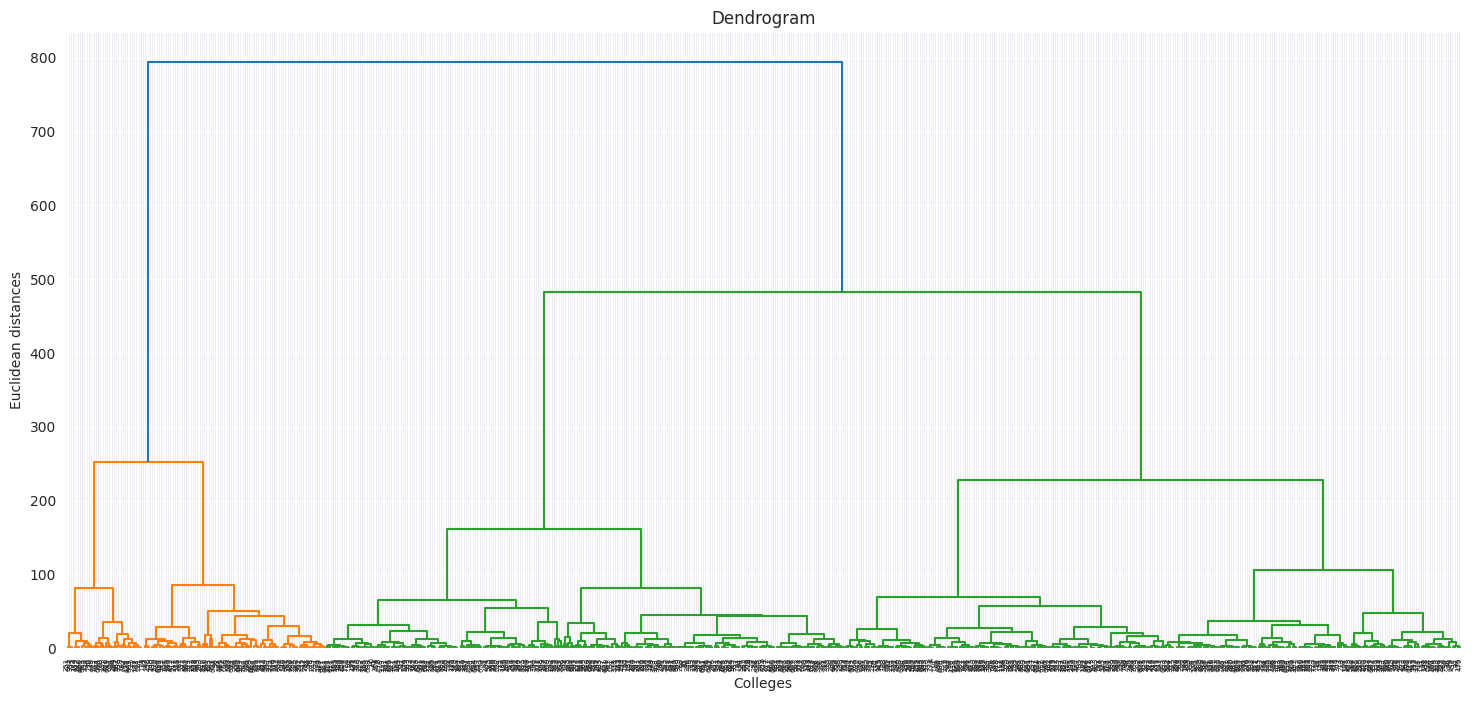

In [20]:
# Plotting the dendrogram
plt.figure(figsize=(18,8))
plt.title('Dendrogram')
plt.xlabel('Colleges')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

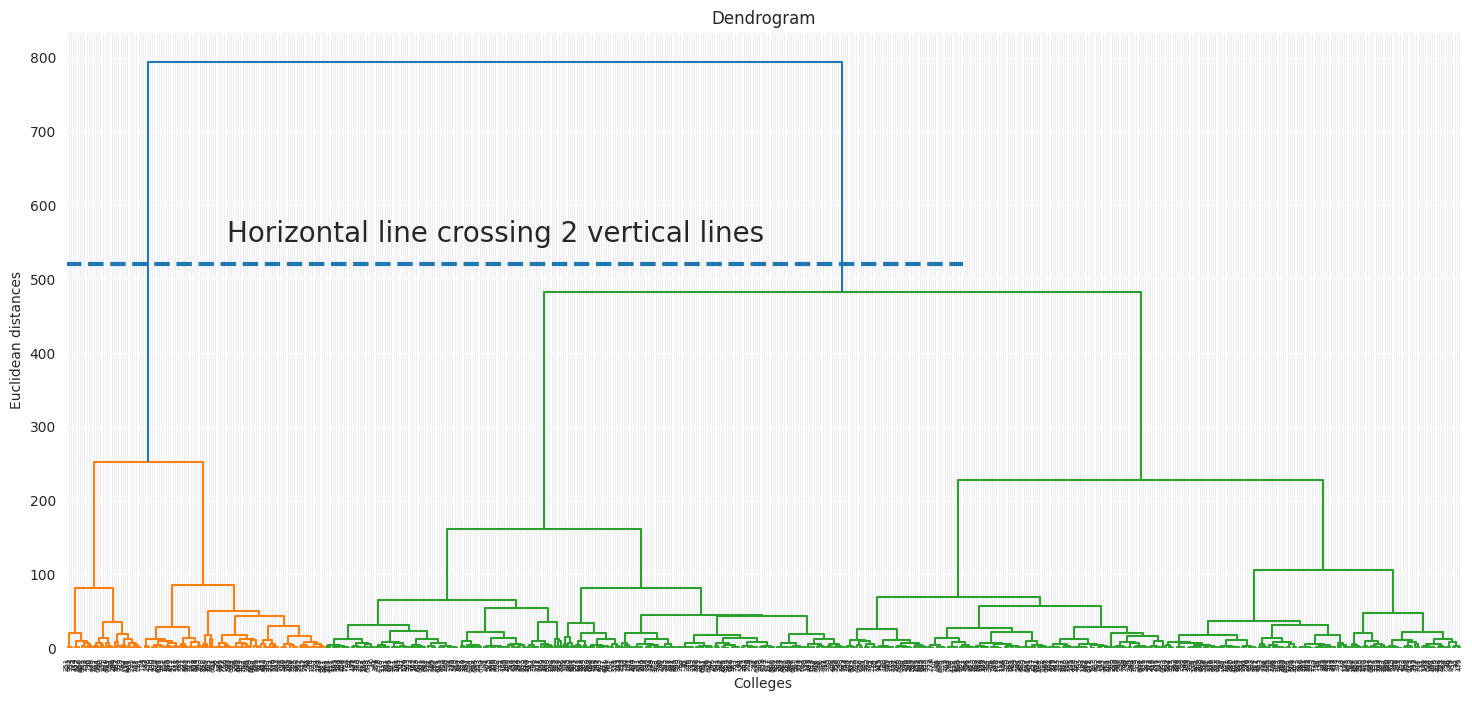

In [21]:
# Cut the dendrogram to get clusters
plt.figure(figsize=(18,8))
plt.title('Dendrogram')
plt.xlabel('Colleges')
plt.ylabel('Euclidean distances')
plt.hlines(y=520,xmin=0,xmax=5000,lw=3,linestyles='--')
plt.text(x=900,y=550,s='Horizontal line crossing 2 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [22]:
# Build the Hierarchical Clustering model
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_h1)

** Be careful: Hierarchical clustering assigns cluster labels based on the positions of the centroids, and the specific label numbers (0, 1, etc.) are arbitrary and can vary between runs. The labels themselves do not carry inherent meaning; they are just identifiers for the clusters. **

In [23]:
if (y_hc[0] == 0):
    y_hc = 1 - y_hc
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## K-Means Clustering

In [24]:
#  Create an instance of a K Means model with 2 clusters
# Because from the original data, we know there are privacy and public 2 classes, so just using it to see accurancy

kmeans = KMeans(n_clusters=2,verbose=0,tol=1e-3,max_iter=300,n_init=20, random_state = 1)
#  Fit the data except feature 'Private'
y_kmeans = kmeans.fit_predict(df_h1)

** Be careful: K-means clustering assigns cluster labels based on the positions of the centroids, and the specific label numbers (0, 1, etc.) are arbitrary and can vary between runs. The labels themselves do not carry inherent meaning; they are just identifiers for the clusters. **

In [25]:
if (y_kmeans[0] == 0):
    y_kmeans = 1 - y_kmeans
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Compare 2 Algrithms Performance

# Compare Matrics (silhouette_score, davies_bouldin_score, calinski_harabasz_score)

In [26]:
# Evaluate clustering performance for Hierarchical Clustering
silhouette_hc = silhouette_score(df_h1, y_hc)
davies_bouldin_hc = davies_bouldin_score(df_h1, y_hc)
calinski_harabasz_hc = calinski_harabasz_score(df_h1, y_hc)

# Evaluate clustering performance for KMeans
silhouette_kmeans = silhouette_score(df_h1, y_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(df_h1, y_kmeans)
calinski_harabasz_kmeans = calinski_harabasz_score(df_h1, y_kmeans)

In [27]:
# Print results
print("Hierarchical Clustering:")
print(f"Silhouette Score: {silhouette_hc}")
print(f"Davies-Bouldin Score: {davies_bouldin_hc}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_hc}")

print("\nKMeans Clustering:")
print(f"Silhouette Score: {silhouette_kmeans}")
print(f"Davies-Bouldin Score: {davies_bouldin_kmeans}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_kmeans}")


Hierarchical Clustering:
Silhouette Score: 0.4373593751352764
Davies-Bouldin Score: 1.1118313380033646
Calinski-Harabasz Score: 321.92973086491725

KMeans Clustering:
Silhouette Score: 0.5599267973651544
Davies-Bouldin Score: 1.1333615659937541
Calinski-Harabasz Score: 379.5868305555298


## Compare 2 Model's Accuracy with Real Pirvate Feature

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
print("\nHierarchical Clustering Confusion Matrix and Classification Report:")
print(confusion_matrix(df_h['Private'], y_hc))
print(classification_report(df_h['Private'], y_hc))


Hierarchical Clustering Confusion Matrix and Classification Report:
[[144  68]
 [ 11 554]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.78       212
           1       0.89      0.98      0.93       565

    accuracy                           0.90       777
   macro avg       0.91      0.83      0.86       777
weighted avg       0.90      0.90      0.89       777



In [33]:
print("\nKMeans Confusion Matrix and Classification Report:")
print(confusion_matrix(df_h['Private'], y_kmeans))
print(classification_report(df_h['Private'], y_kmeans))


KMeans Confusion Matrix and Classification Report:
[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

